In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 63kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=0a448a5782cc9d651064ae5c54a7795c6d86c3538ee8bd933ccc274cddbb15b4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


是 高橋李依 yooooo~~:  [-3.52768451e-02  8.48115534e-02  9.52947289e-02 -4.52649668e-02
 -1.64723277e-01  1.47362053e-02 -7.23857582e-02 -8.28305632e-02
  1.31815001e-01 -1.40679002e-01  1.99062020e-01 -7.32008070e-02
 -2.02948570e-01 -2.12874152e-02 -8.73798281e-02  2.42259488e-01
 -1.62243336e-01 -2.46269420e-01 -1.17790401e-02  5.51999211e-02
  9.35977101e-02 -8.54854286e-03 -2.57043540e-02  5.65368459e-02
 -1.72299802e-01 -3.53517234e-01 -8.36369619e-02 -5.88558055e-03
 -9.38984752e-02 -1.03347301e-01 -1.12659186e-02  3.59805897e-02
 -1.88358217e-01  4.42964509e-02  4.73075211e-02  1.15061373e-01
  3.81413177e-02 -1.32557556e-01  1.23947740e-01 -1.02624297e-04
 -3.98330718e-01  9.70405489e-02  8.70680436e-02  2.17210099e-01
  1.49057165e-01 -1.10312700e-02 -1.08181909e-02 -1.45002991e-01
  9.33292806e-02 -1.65745854e-01  2.80775614e-02  1.50095895e-01
  5.61188310e-02  4.61337268e-02 -2.50689238e-02 -1.32187426e-01
  2.28253286e-02  1.28896832e-01 -1.15401506e-01 -3.49095128e-02
  8.296

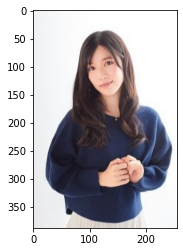

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import face_recognition
img = face_recognition.load_image_file("古城門志帆.jpg")
en = face_recognition.face_encodings(img)[0]
print("是 高橋李依 yooooo~~: ", en)
plt.imshow(img)


In [31]:
import glob

sub = ["jfif", "jpg", "png", "jpeg"]
fn_list = []
for s in sub:
    fn_list = fn_list + glob.glob("*.{}".format(s))
encodings, names = [], []
for fn in fn_list:
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(en)
    n = fn.split(".")[0]
    names.append(n)
print(names)
print(encodings)

['浪川大輔', '古城門志帆', '神谷浩史', '高橋李依']
[array([-0.08894186,  0.04896071,  0.03033968, -0.08829609, -0.19044998,
        0.00364935, -0.10443834, -0.06936572,  0.14281482, -0.12418377,
        0.19409513, -0.0708104 , -0.1845697 ,  0.02098296, -0.10678189,
        0.21620271, -0.13675447, -0.14267868, -0.00168939,  0.03741866,
        0.09380898,  0.06833862, -0.0078729 ,  0.08978664, -0.12746546,
       -0.35826457, -0.13650453, -0.03742748, -0.10903503, -0.06232212,
        0.01491225,  0.00778513, -0.12393506,  0.03203874,  0.08284374,
        0.10233383,  0.02853072, -0.06882461,  0.09511421,  0.0113549 ,
       -0.35491619,  0.06642118,  0.11763368,  0.24554726,  0.16867004,
        0.01499595, -0.01016568, -0.13164818,  0.14901647, -0.15901698,
        0.04023901,  0.11580704,  0.07760544, -0.00214508,  0.01727788,
       -0.11216109,  0.01819237,  0.19599637, -0.12431914,  0.01586889,
        0.08149523, -0.05476782,  0.06193864, -0.08775608,  0.15568557,
        0.07396819, -0.138951

網址:https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS9F1u0uDyBJnooAwO7KCwQzdGC_E9M_lkYPWpFNiKUsNmH9U6O&usqp=CAU


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 浪川大輔 的距離是: 0.5323166040502746
跟 古城門志帆 的距離是: 0.5807622308818932
跟 神谷浩史 的距離是: 0.5770503189916609
跟 高橋李依 的距離是: 0.5324367858573285
這個最像: 浪川大輔


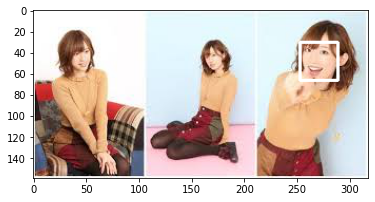

In [35]:
import requests
import cv2
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, names):
        print("跟", n, "的距離是:", d)
    mind = names[distances.argmin()]
    print("這個最像:", mind)
plt.imshow(img)